In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Pre-pre processing:
# set up rng
# from frozendict import V
seed = 0
np.random.seed(seed)
num_samples = 800

# # load in baseline health cost with 0 change in generation
# baseline = pd.read_csv("C:\\Users\\elrog\\COBRA\\input files\\new data\\Output_080425_2\\NoChange.csv", nrows = 5)

# y_base = np.zeros((1,2))
# # save minimum and maximum baseline values
# min_base = baseline.at[0,'$ Total Health Benefits(low estimate)'] / 2000
# min_base = min_base.split()[-1]
# max_base = baseline.at[0,'$ Total Health Benefits(high estimate)'] / 2000
# max_base = max_base.split()[-1]

# y_base[0] = [float(min_base),float(max_base)]
# print(y_base)

In [24]:
# next load in health data
y_health = np.zeros((num_samples, 2))
x_emvect = np.zeros((num_samples, 4, 42))

index = 0
# for i in range(num_samples+num_skipped):
for i in range(num_samples):
    # first extract health data from each trial
    file = pd.read_csv('C:\\Users\\Loaner\\Desktop\\COBRA Outcomes\\Experiment 082325\\Outcome'+str(i+1)+'.csv', nrows=5)
    emissions_file = pd.read_csv('C:\\Users\\Loaner\\Desktop\\powersystemspublichealth\\EmissionsScenarios\\Scenarios082325\\DataFile'+str(i+1)+'.csv')

    min = file.at[0,'$ Total Health Benefits(low estimate)']
    min = float(min.split()[-1])

    max = file.at[0,'$ Total Health Benefits(high estimate)']
    max = float(max.split()[-1])

    y_health[i] = [float(min),float(max)]    

    # Nox = emissions_file['NOx'].to_numpy()
    # So2 = emissions_file['SO2'].to_numpy()
    x_emvect[i] = [emissions_file['NOx'].to_numpy(),emissions_file['SO2'].to_numpy(),emissions_file['PM25'].to_numpy(),emissions_file['VOC'].to_numpy()]


# # index: [datafile][emission][entry]
# # emvect: [NOx, SO2, PM25,VOC]
# print(x_emvect[1][1][1])
# print(x_emvect.size())
# print(x_emvect)


In [25]:
print(y_health)

[[-3121879.6309119  -4325635.69037655]
 [-2459850.65728263 -3435052.28188826]
 [-2912872.12967135 -4060500.2603103 ]
 ...
 [-3292262.34421563 -4578357.59410896]
 [-2656950.99441688 -3695101.5107903 ]
 [-3184761.05293751 -4430906.15124934]]


In [26]:
# split data into 75% training set and 25% testing
indx = int(0.75*num_samples)

x_train = x_emvect[:indx]
x_test = x_emvect[indx:]

# print(x_train.shape)

# print(x_test)

y_train = y_health[:indx,:]
y_test = y_health[indx:,:]

# Steps from ChatGPT
# Flatten Data points to be used in regression:
# Step 1: Flatten each sample (4, 42) → (168,)
X_train = np.array([dp.flatten() for dp in x_train])
X_test = np.array([dp.flatten() for dp in x_test])
# X_train = x_train.reshape(indx, -1)  # Shape becomes (5, 168)
# X_test = x_test.reshape(indx, -1)

# Step 2: Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions (optional)
y_pred = model.predict(X_test)


In [29]:
print("Coefficients shape:", model.coef_.shape)  # (168,)
# print("Coefficients: \n", model.coef_)

# print(y_test[:,0])
# print(y_pred[:,0])
print("Mean squared error (low est): %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0]))
print("Coefficient of determination (low est): %.2f" % r2_score(y_test[:,0], y_pred[:,0]))
print("Mean squared error (high est): %.2f" % mean_squared_error(y_test[:,1], y_pred[:,1]))
print("Coefficient of determination (high est): %.2f" % r2_score(y_test[:,1], y_pred[:,1]))
# print("Predictions:", y_pred)

Coefficients shape: (2, 168)
Mean squared error (low est): 0.01
Coefficient of determination (low est): 1.00
Mean squared error (high est): 0.01
Coefficient of determination (high est): 1.00


In [ ]:
# print("Coefficients: \n", model.coef_)
# type(model.coef_)
coeffs = pd.DataFrame(model.coef_.transpose(), columns=['Low Estimate', 'High Estimate'])
coeffs2 = pd.DataFrame(model.coef_)

# coeffs.to_csv('linrgrTonsCoeffsFINAL',index=False)

# print(coeffs)
# print(coeffs2)
# print(coeffs.head())
# print(coeffs2.head())

     Low Estimate  High Estimate
0    8.520363e-11   1.054498e-10
1   -1.078640e+05  -1.454223e+05
2   -1.008673e-03  -8.809011e-04
3    2.706656e-09   3.477908e-09
4   -1.396984e-09  -1.746230e-09
..            ...            ...
163 -7.483046e+02  -9.642808e+02
164  0.000000e+00   0.000000e+00
165 -7.963948e+02  -1.006256e+03
166  0.000000e+00   0.000000e+00
167  0.000000e+00   0.000000e+00

[168 rows x 2 columns]
            0              1         2             3             4    \
0  8.520363e-11 -107863.971003 -0.001009  2.706656e-09 -1.396984e-09   
1  1.054498e-10 -145422.332810 -0.000881  3.477908e-09 -1.746230e-09   

            5             6             7             8              9    ...  \
0 -67420.868470 -4.729372e-11 -43280.457740 -2.095476e-09 -111987.400727  ...   
1 -85928.105573 -2.110028e-10 -59711.020478 -2.677552e-09 -157807.150222  ...   

   158          159          160          161          162         163  164  \
0  0.0 -1728.912274 -1219.517423 -1728.9

Coefficients shape: (2, 168)
Mean squared error: 0.07
Coefficient of determination: 1.00
Root mean squared error: 0.27


Text(0, 0.5, 'Predicted Health outcomes ($)')

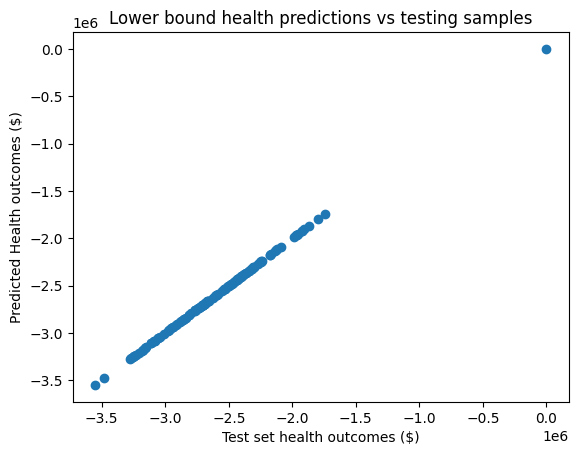

In [81]:
# lower health estimates
print("Coefficients shape:", model.coef_.shape)  # (168,)
# print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0]))
print("Coefficient of determination: %.2f" % r2_score(y_test[:,0], y_pred[:,0], force_finite = False))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test[:,0], y_pred[:,0]))

# this is the lower health outcomes
plt.scatter(y_test[:,0],y_pred[:,0])
plt.title("Lower bound health predictions vs testing samples")
plt.xlabel("Test set health outcomes ($)")
plt.ylabel("Predicted Health outcomes ($)")

# print("Mean squared error: %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0],multioutput='raw_values'))

Mean squared error: 0.09
Coefficient of determination: 1.00
Root mean squared error: 0.29


Text(0, 0.5, 'Predicted Health outcomes ($)')

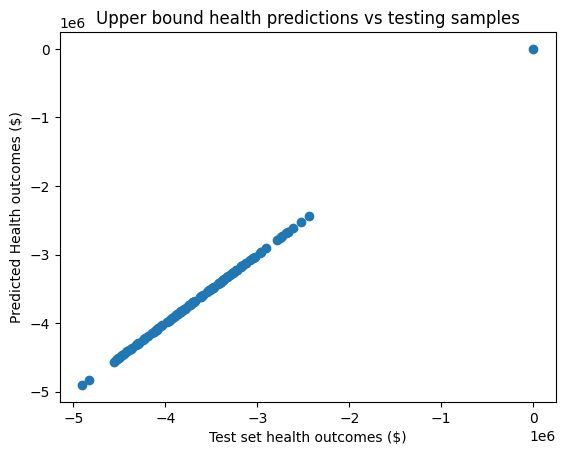

In [82]:
# higher health estimates
# print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test[:,1], y_pred[:,1]))
print("Coefficient of determination: %.2f" % r2_score(y_test[:,1], y_pred[:,1], force_finite = False))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test[:,1], y_pred[:,1]))

# this is the higher estimate health outcomes
plt.scatter(y_test[:,1],y_pred[:,1])
plt.title("Upper bound health predictions vs testing samples")
plt.xlabel("Test set health outcomes ($)")
plt.ylabel("Predicted Health outcomes ($)")
# print("Mean squared error: %.2f" % mean_squared_error(y_test[:,0], y_pred[:,0],multioutput='raw_values'))

In [83]:
# is this the right formulation tho?? 
rel_rootmse_low = root_mean_squared_error(y_test[:,1], y_pred[:,1]) / np.mean(y_test[:,0])
rel_rootmse_high = root_mean_squared_error(y_test[:,1], y_pred[:,1]) / np.mean(y_test[:,0])
print("low rrmse:",rel_rootmse_low)
print("high rrmse:",rel_rootmse_high)




low rrmse: -1.1217341653264477e-07
high rrmse: -1.1217341653264477e-07
